# Monitoring Near-Earth Asteroids using Data Science

Purpose: The following notebook provides an interface to analyze near-earth asteriods using data from the NASA API. The following functions are meant to download, preprocess, and visualize asteroid data.

Author: Jordan A. Caraballo-Vega

Version: 2024.02.22

## Import Python Libraries

In this section we will import the necessary Python libraries.

In [ ]:
import os
import json
import datetime
import requests
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Fetch the Asteroid Data for a Single Date

In this section we will download the asteroid data for a single date. First, we define general variables needed to obtain the asteroid data. To avoid exposing my API key, I assign it to a file and read from it.

In [ ]:
api_key = open('drive/MyDrive/Terminal34/nasa-api.txt', 'r').readline() # Replace with your NASA API key
start_date = '2024-02-21' # Example date
end_date = '2024-02-21' # Same as start_date for one day's data

In [ ]:
url = 'https://api.nasa.gov/neo/rest/v1/feed?' + \
  f'start_date={start_date}&end_date={end_date}&api_key={api_key}'

In [ ]:
# use the requests library to generate the request for data download
response = requests.get(url)
print(response)

if response.status_code == 200:
  data = response.json()  # Parse JSON Data
  print('Downloaded data correctly.')
else:
  print('Failed to retrieve data. Please check your API key and internet connection.')

<Response [200]>
Downloaded data correctly.


In [ ]:
data

{'links': {'next': 'http://api.nasa.gov/neo/rest/v1/feed?start_date=2024-02-22&end_date=2024-02-22&detailed=false&api_key=AZrjEZKBctLv3n5JXgFlMJQPkVEBVX5WK2Zj0uWV',
  'prev': 'http://api.nasa.gov/neo/rest/v1/feed?start_date=2024-02-20&end_date=2024-02-20&detailed=false&api_key=AZrjEZKBctLv3n5JXgFlMJQPkVEBVX5WK2Zj0uWV',
  'self': 'http://api.nasa.gov/neo/rest/v1/feed?start_date=2024-02-21&end_date=2024-02-21&detailed=false&api_key=AZrjEZKBctLv3n5JXgFlMJQPkVEBVX5WK2Zj0uWV'},
 'element_count': 14,
 'near_earth_objects': {'2024-02-21': [{'links': {'self': 'http://api.nasa.gov/neo/rest/v1/neo/2417264?api_key=AZrjEZKBctLv3n5JXgFlMJQPkVEBVX5WK2Zj0uWV'},
    'id': '2417264',
    'neo_reference_id': '2417264',
    'name': '417264 (2006 AT2)',
    'nasa_jpl_url': 'https://ssd.jpl.nasa.gov/tools/sbdb_lookup.html#/?sstr=2417264',
    'absolute_magnitude_h': 17.13,
    'estimated_diameter': {'kilometers': {'estimated_diameter_min': 0.99667824,
      'estimated_diameter_max': 2.2286402963},
     'me

In [ ]:
# get the piece of data we need from the json object
asteroids = data['near_earth_objects'][start_date]
asteroids

[{'links': {'self': 'http://api.nasa.gov/neo/rest/v1/neo/2417264?api_key=AZrjEZKBctLv3n5JXgFlMJQPkVEBVX5WK2Zj0uWV'},
  'id': '2417264',
  'neo_reference_id': '2417264',
  'name': '417264 (2006 AT2)',
  'nasa_jpl_url': 'https://ssd.jpl.nasa.gov/tools/sbdb_lookup.html#/?sstr=2417264',
  'absolute_magnitude_h': 17.13,
  'estimated_diameter': {'kilometers': {'estimated_diameter_min': 0.99667824,
    'estimated_diameter_max': 2.2286402963},
   'meters': {'estimated_diameter_min': 996.6782399685,
    'estimated_diameter_max': 2228.6402962644},
   'miles': {'estimated_diameter_min': 0.6193069546,
    'estimated_diameter_max': 1.3848124495},
   'feet': {'estimated_diameter_min': 3269.9418368182,
    'estimated_diameter_max': 7311.8122295961}},
  'is_potentially_hazardous_asteroid': False,
  'close_approach_data': [{'close_approach_date': '2024-02-21',
    'close_approach_date_full': '2024-Feb-21 10:10',
    'epoch_date_close_approach': 1708510200000,
    'relative_velocity': {'kilometers_per_s

In [ ]:
# how many asteroid observations do we have
len(asteroids)

14

In [ ]:
# simple data assimilation, the row values are not completely
# set into a single value, lots of multi-object columns
df = pd.DataFrame(asteroids)
df.head()

,links,id,neo_reference_id,name,nasa_jpl_url,absolute_magnitude_h,estimated_diameter,is_potentially_hazardous_asteroid,close_approach_data,is_sentry_object
0,{'self': 'http://api.nasa.gov/neo/rest/v1/neo/...,2417264,2417264,417264 (2006 AT2),https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,17.13,{'kilometers': {'estimated_diameter_min': 0.99...,False,"[{'close_approach_date': '2024-02-21', 'close_...",False
1,{'self': 'http://api.nasa.gov/neo/rest/v1/neo/...,3743897,3743897,(2016 CO246),https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,25.80,{'kilometers': {'estimated_diameter_min': 0.01...,False,"[{'close_approach_date': '2024-02-21', 'close_...",False
2,{'self': 'http://api.nasa.gov/neo/rest/v1/neo/...,3760491,3760491,(2016 TA11),https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,27.10,{'kilometers': {'estimated_diameter_min': 0.01...,False,"[{'close_approach_date': '2024-02-21', 'close_...",False
3,{'self': 'http://api.nasa.gov/neo/rest/v1/neo/...,54049356,54049356,(2020 OP3),https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,20.96,{'kilometers': {'estimated_diameter_min': 0.17...,True,"[{'close_approach_date': '2024-02-21', 'close_...",False
4,{'self': 'http://api.nasa.gov/neo/rest/v1/neo/...,54054459,54054459,(2020 RS9),https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,23.90,{'kilometers': {'estimated_diameter_min': 0.04...,False,"[{'close_approach_date': '2024-02-21', 'close_...",False


In [ ]:
# better assimilation, lets cleanup the data ourselves
asteroids_data_list = []
for asteroid in asteroids:

    # print the keys from the json dictionary for each observation
    # dict_keys(['links', 'id', 'neo_reference_id', 'name', 'nasa_jpl_url',
    # 'absolute_magnitude_h', 'estimated_diameter', 'is_potentially_hazardous_asteroid', 'close_approach_data', 'is_sentry_object'])

    # example use case to insert the data
    # print(asteroid['is_sentry_object'])

    # get the data we need
    asteroid_data_dict = {
        'name': asteroid['name'],
        'id': asteroid['id'],
        'neo_reference_id': asteroid['neo_reference_id'],
        'link': asteroid['links']['self'],
        'nasa_jpl_url': asteroid['nasa_jpl_url'],
        'absolute_magnitude_h': asteroid['absolute_magnitude_h'],
        'is_sentry_object': asteroid['is_sentry_object'],
        'is_potentially_hazardous_asteroid': asteroid['is_potentially_hazardous_asteroid'],
        'diameter': asteroid['estimated_diameter']['meters']['estimated_diameter_max']
    }

    # {'close_approach_date': '2024-02-21', 'close_approach_date_full': '2024-Feb-21 10:10', 'epoch_date_close_approach': 1708510200000, 'relative_velocity': {'kilometers_per_second': '15.3033181047', 'kilometers_per_hour': '55091.9451769682', 'miles_per_hour': '34231.9922684334'}, 'miss_distance': {'astronomical': '0.1598481563', 'lunar': '62.1809328007', 'kilometers': '23912943.705907081', 'miles': '14858814.2064804778'}, 'orbiting_body': 'Earth'}

    print(asteroid_data_dict)
    #print(asteroid['close_approach_data'][0])
    asteroid_data_dict.update(asteroid['close_approach_data'][0])
    asteroids_data_list.append(asteroid_data_dict)


{'name': '417264 (2006 AT2)', 'id': '2417264', 'neo_reference_id': '2417264', 'link': 'http://api.nasa.gov/neo/rest/v1/neo/2417264?api_key=AZrjEZKBctLv3n5JXgFlMJQPkVEBVX5WK2Zj0uWV', 'nasa_jpl_url': 'https://ssd.jpl.nasa.gov/tools/sbdb_lookup.html#/?sstr=2417264', 'absolute_magnitude_h': 17.13, 'is_sentry_object': False, 'is_potentially_hazardous_asteroid': False, 'diameter': 2228.6402962644}
{'name': '(2016 CO246)', 'id': '3743897', 'neo_reference_id': '3743897', 'link': 'http://api.nasa.gov/neo/rest/v1/neo/3743897?api_key=AZrjEZKBctLv3n5JXgFlMJQPkVEBVX5WK2Zj0uWV', 'nasa_jpl_url': 'https://ssd.jpl.nasa.gov/tools/sbdb_lookup.html#/?sstr=3743897', 'absolute_magnitude_h': 25.8, 'is_sentry_object': False, 'is_potentially_hazardous_asteroid': False, 'diameter': 41.1187571041}
{'name': '(2016 TA11)', 'id': '3760491', 'neo_reference_id': '3760491', 'link': 'http://api.nasa.gov/neo/rest/v1/neo/3760491?api_key=AZrjEZKBctLv3n5JXgFlMJQPkVEBVX5WK2Zj0uWV', 'nasa_jpl_url': 'https://ssd.jpl.nasa.gov/

In [ ]:
df = pd.DataFrame(asteroids_data_list)
df.head()

,name,id,neo_reference_id,link,nasa_jpl_url,absolute_magnitude_h,is_sentry_object,is_potentially_hazardous_asteroid,diameter,close_approach_date,close_approach_date_full,epoch_date_close_approach,relative_velocity,miss_distance,orbiting_body
0,417264 (2006 AT2),2417264,2417264,http://api.nasa.gov/neo/rest/v1/neo/2417264?ap...,https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,17.13,False,False,2228.640296,2024-02-21,2024-Feb-21 10:10,1708510200000,"{'kilometers_per_second': '15.3033181047', 'ki...","{'astronomical': '0.1598481563', 'lunar': '62....",Earth
1,(2016 CO246),3743897,3743897,http://api.nasa.gov/neo/rest/v1/neo/3743897?ap...,https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,25.80,False,False,41.118757,2024-02-21,2024-Feb-21 18:35,1708540500000,"{'kilometers_per_second': '9.7828523536', 'kil...","{'astronomical': '0.1746465265', 'lunar': '67....",Earth
2,(2016 TA11),3760491,3760491,http://api.nasa.gov/neo/rest/v1/neo/3760491?ap...,https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,27.10,False,False,22.596438,2024-02-21,2024-Feb-21 19:12,1708542720000,"{'kilometers_per_second': '11.7367782563', 'ki...","{'astronomical': '0.1327095376', 'lunar': '51....",Earth
3,(2020 OP3),54049356,54049356,http://api.nasa.gov/neo/rest/v1/neo/54049356?a...,https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,20.96,False,True,381.979432,2024-02-21,2024-Feb-21 08:46,1708505160000,"{'kilometers_per_second': '23.477571714', 'kil...","{'astronomical': '0.4311950044', 'lunar': '167...",Earth
4,(2020 RS9),54054459,54054459,http://api.nasa.gov/neo/rest/v1/neo/54054459?a...,https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,23.90,False,False,98.637028,2024-02-21,2024-Feb-21 08:57,1708505820000,"{'kilometers_per_second': '15.6901253766', 'ki...","{'astronomical': '0.2771224704', 'lunar': '107...",Earth


In [ ]:
relative_velocity_df = pd.json_normalize(df['relative_velocity'])
relative_velocity_df.head(2)

,kilometers_per_second,kilometers_per_hour,miles_per_hour
0,15.3033181047,55091.9451769682,34231.9922684334
1,9.7828523536,35218.2684729236,21883.2624297452


In [ ]:
miss_distance_df = pd.json_normalize(df['miss_distance'])
miss_distance_df.head(2)

,astronomical,lunar,kilometers,miles
0,0.1598481563,62.1809328007,23912943.705907081,14858814.2064804778
1,0.1746465265,67.9374988085,26126748.367298555,16234408.635907859


In [ ]:
asteroid_df = pd.concat(
    [df, relative_velocity_df, miss_distance_df], axis=1)
asteroid_df.head()

,name,id,neo_reference_id,link,nasa_jpl_url,absolute_magnitude_h,is_sentry_object,is_potentially_hazardous_asteroid,diameter,close_approach_date,...,relative_velocity,miss_distance,orbiting_body,kilometers_per_second,kilometers_per_hour,miles_per_hour,astronomical,lunar,kilometers,miles
0,417264 (2006 AT2),2417264,2417264,http://api.nasa.gov/neo/rest/v1/neo/2417264?ap...,https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,17.13,False,False,2228.640296,2024-02-21,...,"{'kilometers_per_second': '15.3033181047', 'ki...","{'astronomical': '0.1598481563', 'lunar': '62....",Earth,15.3033181047,55091.9451769682,34231.9922684334,0.1598481563,62.1809328007,23912943.705907081,14858814.2064804778
1,(2016 CO246),3743897,3743897,http://api.nasa.gov/neo/rest/v1/neo/3743897?ap...,https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,25.80,False,False,41.118757,2024-02-21,...,"{'kilometers_per_second': '9.7828523536', 'kil...","{'astronomical': '0.1746465265', 'lunar': '67....",Earth,9.7828523536,35218.2684729236,21883.2624297452,0.1746465265,67.9374988085,26126748.367298555,16234408.635907859
2,(2016 TA11),3760491,3760491,http://api.nasa.gov/neo/rest/v1/neo/3760491?ap...,https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,27.10,False,False,22.596438,2024-02-21,...,"{'kilometers_per_second': '11.7367782563', 'ki...","{'astronomical': '0.1327095376', 'lunar': '51....",Earth,11.7367782563,42252.4017225025,26253.9992814072,0.1327095376,51.6240101264,19853064.153644912,12336122.0314953056
3,(2020 OP3),54049356,54049356,http://api.nasa.gov/neo/rest/v1/neo/54049356?a...,https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,20.96,False,True,381.979432,2024-02-21,...,"{'kilometers_per_second': '23.477571714', 'kil...","{'astronomical': '0.4311950044', 'lunar': '167...",Earth,23.477571714,84519.2581704389,52516.9801670708,0.4311950044,167.7348567116,64505854.212880628,40082079.1771755464
4,(2020 RS9),54054459,54054459,http://api.nasa.gov/neo/rest/v1/neo/54054459?a...,https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,23.90,False,False,98.637028,2024-02-21,...,"{'kilometers_per_second': '15.6901253766', 'ki...","{'astronomical': '0.2771224704', 'lunar': '107...",Earth,15.6901253766,56484.4513558151,35097.2414549508,0.2771224704,107.8006409856,41456931.300978048,25760142.5967431424


In [ ]:
asteroid_df = asteroid_df.drop(
    ['relative_velocity', 'miss_distance'], axis=1)
asteroid_df

,name,id,neo_reference_id,link,nasa_jpl_url,absolute_magnitude_h,is_sentry_object,is_potentially_hazardous_asteroid,diameter,close_approach_date,close_approach_date_full,epoch_date_close_approach,orbiting_body,kilometers_per_second,kilometers_per_hour,miles_per_hour,astronomical,lunar,kilometers,miles
0,417264 (2006 AT2),2417264,2417264,http://api.nasa.gov/neo/rest/v1/neo/2417264?ap...,https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,17.130,False,False,2228.640296,2024-02-21,2024-Feb-21 10:10,1708510200000,Earth,15.3033181047,55091.9451769682,34231.9922684334,0.1598481563,62.1809328007,23912943.705907081,14858814.2064804778
1,(2016 CO246),3743897,3743897,http://api.nasa.gov/neo/rest/v1/neo/3743897?ap...,https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,25.800,False,False,41.118757,2024-02-21,2024-Feb-21 18:35,1708540500000,Earth,9.7828523536,35218.2684729236,21883.2624297452,0.1746465265,67.9374988085,26126748.367298555,16234408.635907859
2,(2016 TA11),3760491,3760491,http://api.nasa.gov/neo/rest/v1/neo/3760491?ap...,https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,27.100,False,False,22.596438,2024-02-21,2024-Feb-21 19:12,1708542720000,Earth,11.7367782563,42252.4017225025,26253.9992814072,0.1327095376,51.6240101264,19853064.153644912,12336122.0314953056
3,(2020 OP3),54049356,54049356,http://api.nasa.gov/neo/rest/v1/neo/54049356?a...,https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,20.960,False,True,381.979432,2024-02-21,2024-Feb-21 08:46,1708505160000,Earth,23.477571714,84519.2581704389,52516.9801670708,0.4311950044,167.7348567116,64505854.212880628,40082079.1771755464
4,(2020 RS9),54054459,54054459,http://api.nasa.gov/neo/rest/v1/neo/54054459?a...,https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,23.900,False,False,98.637028,2024-02-21,2024-Feb-21 08:57,1708505820000,Earth,15.6901253766,56484.4513558151,35097.2414549508,0.2771224704,107.8006409856,41456931.300978048,25760142.5967431424
5,(2021 PK4),54179306,54179306,http://api.nasa.gov/neo/rest/v1/neo/54179306?a...,https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,28.190,False,False,13.678547,2024-02-21,2024-Feb-21 23:38,1708558680000,Earth,16.1847655803,58265.1560891282,36203.702126603,0.1848144716,71.8928294524,27647851.296535492,17179578.1680421096
6,(2021 QE5),54191344,54191344,http://api.nasa.gov/neo/rest/v1/neo/54191344?a...,https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,22.150,False,False,220.820800,2024-02-21,2024-Feb-21 00:18,1708474680000,Earth,10.0062392116,36022.4611618234,22382.9564924674,0.1665679914,64.7949486546,24918216.723618318,15483461.8943880684
7,(2022 GE3),54269715,54269715,http://api.nasa.gov/neo/rest/v1/neo/54269715?a...,https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,23.130,False,False,140.617696,2024-02-21,2024-Feb-21 21:17,1708550220000,Earth,6.9591742967,25053.0274679846,15566.9769842041,0.2338046686,90.9500160854,34976680.418615882,21733501.4162758916
8,(2022 OK5),54292690,54292690,http://api.nasa.gov/neo/rest/v1/neo/54292690?a...,https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,23.250,False,False,133.057690,2024-02-21,2024-Feb-21 17:25,1708536300000,Earth,29.8338213427,107401.7568338154,66735.2749615449,0.4691880974,182.5141698886,70189540.000392538,43613757.7594235044
9,(2022 QB8),54298995,54298995,http://api.nasa.gov/neo/rest/v1/neo/54298995?a...,https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,25.850,False,False,40.182780,2024-02-21,2024-Feb-21 21:32,1708551120000,Earth,10.5301930797,37908.6950867929,23554.988899902,0.066009367,25.677643763,9874860.70324829,6135953.913034802


In [ ]:
# question 1: number of asteroids for this day
num_asteroids = len(asteroid_df)
print(f"Number of asteroids on {start_date}: {num_asteroids}")

Number of asteroids on 2024-02-21: 14


In [ ]:
# question 2: largest asteroid based on diameter
largest_asteroid = asteroid_df.loc[asteroid_df['diameter'].idxmax()]
print(f"Largest asteroid: {largest_asteroid['name']} (Diameter: {largest_asteroid['diameter']} meters)")

Largest asteroid: 417264 (2006 AT2) (Diameter: 2228.6402962644 meters)


## Adding Visualizations

As part of EDA, we will add certain visualization.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='diameter', ylabel='Count'>

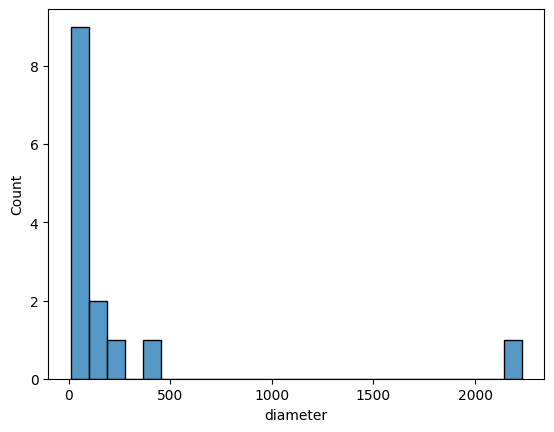

In [ ]:
sns.histplot(data=asteroid_df, x="diameter")

<Axes: xlabel='diameter', ylabel='Count'>

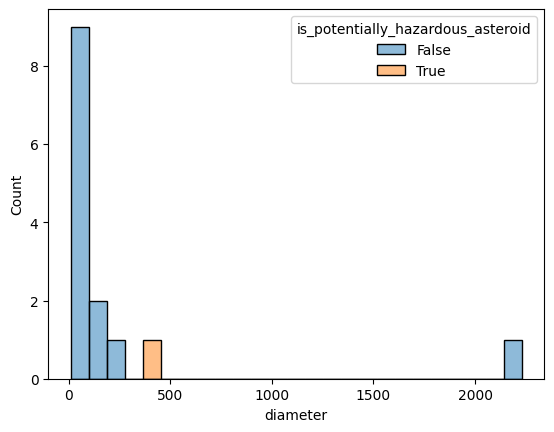

In [ ]:
sns.histplot(data=asteroid_df, x="diameter", hue="is_potentially_hazardous_asteroid")

<Axes: xlabel='is_potentially_hazardous_asteroid', ylabel='diameter'>

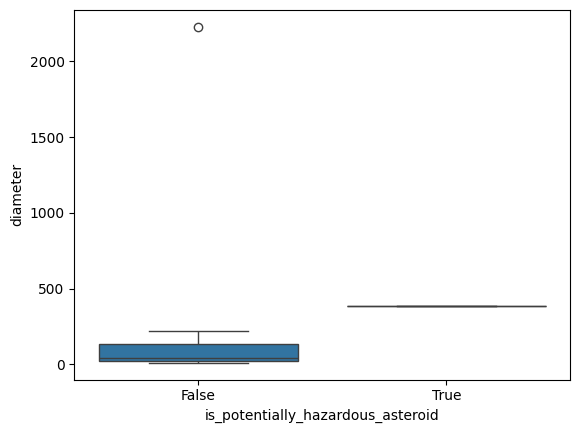

In [ ]:
sns.boxplot(data=asteroid_df, x="is_potentially_hazardous_asteroid", y="diameter")

<Axes: xlabel='diameter', ylabel='name'>

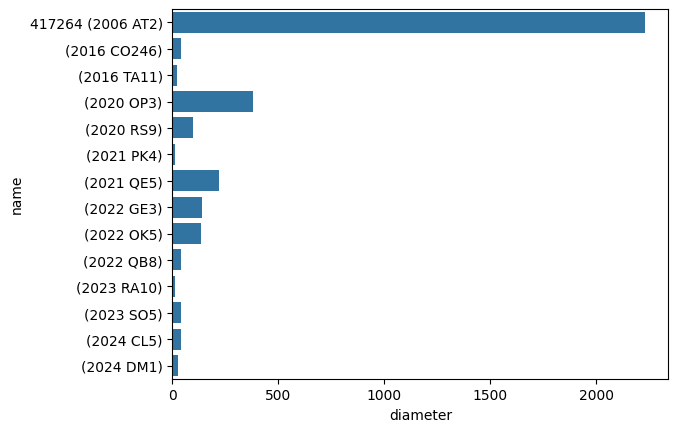

In [ ]:
sns.barplot(data=asteroid_df, x="diameter", y="name")

<Axes: xlabel='diameter', ylabel='name'>

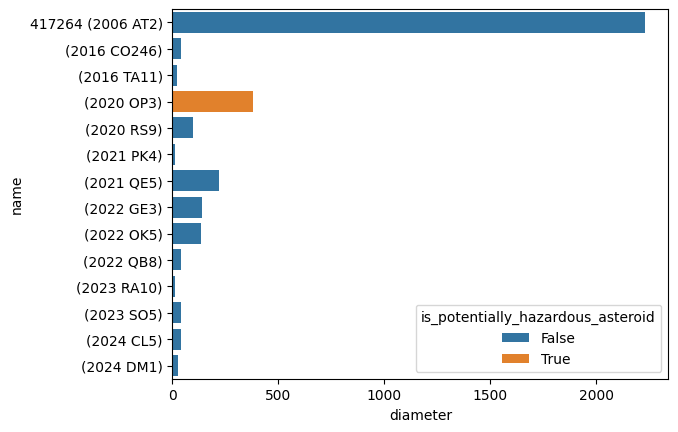

In [ ]:
sns.barplot(data=asteroid_df, x="diameter", y="name", hue="is_potentially_hazardous_asteroid")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, '2024-Feb-21 00:18'),
  Text(1, 0, '2024-Feb-21 03:52'),
  Text(2, 0, '2024-Feb-21 05:15'),
  Text(3, 0, '2024-Feb-21 08:46'),
  Text(4, 0, '2024-Feb-21 08:57'),
  Text(5, 0, '2024-Feb-21 10:10'),
  Text(6, 0, '2024-Feb-21 15:19'),
  Text(7, 0, '2024-Feb-21 17:25'),
  Text(8, 0, '2024-Feb-21 18:35'),
  Text(9, 0, '2024-Feb-21 19:12'),
  Text(10, 0, '2024-Feb-21 21:15'),
  Text(11, 0, '2024-Feb-21 21:17'),
  Text(12, 0, '2024-Feb-21 21:32'),
  Text(13, 0, '2024-Feb-21 23:38')])

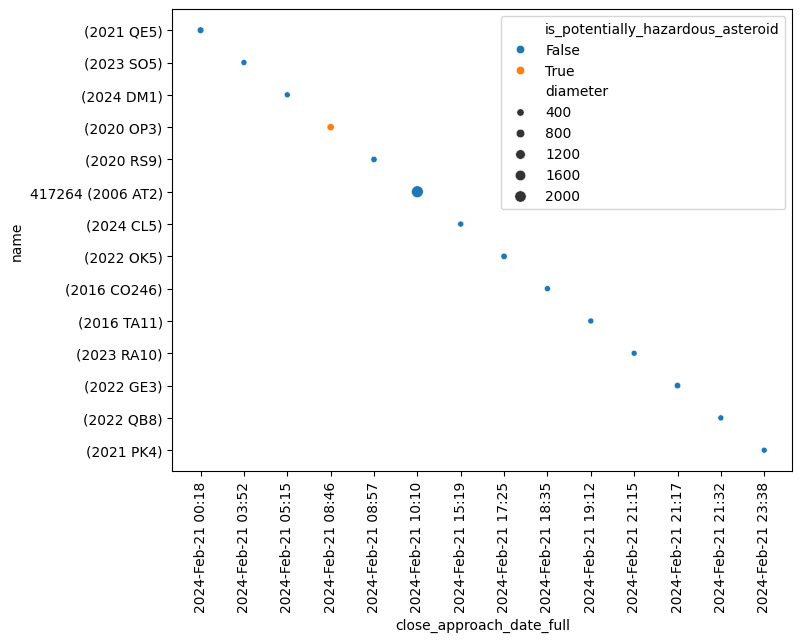

In [ ]:
plt.figure(figsize=(8, 6))
ordered_df = asteroid_df.sort_values(by=['close_approach_date_full'])
sns.scatterplot(
    data=ordered_df, x='close_approach_date_full', y='name', hue='is_potentially_hazardous_asteroid', size='diameter')
plt.xticks(rotation=90)


## Downloading dataset for multiple days in a year

For this we need to iterate over the days in the year and then download the data.

In [ ]:
start_date = '2023-01-01'
end_date = '2024-01-01'
output_dir = 'drive/MyDrive/Terminal34/asteroid-time-series'

In [ ]:
# create output directory
os.makedirs(output_dir, exist_ok=True)

In [ ]:
daterange = pd.date_range(start_date, end_date)
daterange

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10',
               ...
               '2023-12-23', '2023-12-24', '2023-12-25', '2023-12-26',
               '2023-12-27', '2023-12-28', '2023-12-29', '2023-12-30',
               '2023-12-31', '2024-01-01'],
              dtype='datetime64[ns]', length=366, freq='D')

In [ ]:
def download_data(single_start_date, single_end_date, api_key, output_dir):

    # set url
    url = 'https://api.nasa.gov/neo/rest/v1/feed?' + \
      f'start_date={single_start_date}&end_date={single_end_date}&api_key={api_key}'

    # download data, and save to json
    output_filename = os.path.join(
        output_dir, f'{single_start_date}_{single_end_date}.json')

    # if file does not exist, download the data and store the file
    if not os.path.isfile(output_filename):

        response = requests.get(url)

        if response.status_code == 200:

          # get json output
          data = response.json()  # Parse JSON Data
          print('Downloaded data correctly.')

          # save json file
          with open(output_filename, 'w') as outfile:
            json.dump(data, outfile)
        else:
          print('Failed to retrieve data. Please check your API key and internet connection.')

    return

In [ ]:
for single_date in daterange:

    single_start_date = single_date.strftime("%Y-%m-%d")
    single_end_date = (single_date + datetime.timedelta(1)).strftime("%Y-%m-%d")

    print(f'Downloading data for {single_start_date} to {single_end_date}')

    download_data(single_start_date, single_end_date, api_key, output_dir)

Downloaded data correctly.
Downloaded data correctly.
Downloaded data correctly.
Downloaded data correctly.
Downloaded data correctly.
Downloaded data correctly.
Downloaded data correctly.
Downloaded data correctly.
Downloaded data correctly.
Downloaded data correctly.
Downloaded data correctly.
Downloaded data correctly.
Downloaded data correctly.
Downloaded data correctly.
Downloaded data correctly.
Downloaded data correctly.
Downloaded data correctly.
Downloaded data correctly.
Downloaded data correctly.
Downloaded data correctly.
Downloaded data correctly.
Downloaded data correctly.
Downloaded data correctly.
Downloaded data correctly.
Downloaded data correctly.
Downloaded data correctly.
Downloaded data correctly.
Downloaded data correctly.
Downloaded data correctly.
Downloaded data correctly.
Downloaded data correctly.
Downloaded data correctly.
Downloaded data correctly.
Downloaded data correctly.
Downloaded data correctly.
Downloaded data correctly.
Downloaded data correctly.
D

In [ ]:
from glob import glob

asteroid_filenames = glob(os.path.join(output_dir, '*.json'))
len(asteroid_filenames)

366

In [ ]:
asteroid_df_list = []
for asteroid_filename in asteroid_filenames:

    # read json file
    print(asteroid_filename)

drive/MyDrive/Terminal34/asteroid-time-series/2023-01-01_2023-01-02.json
drive/MyDrive/Terminal34/asteroid-time-series/2023-01-02_2023-01-03.json
drive/MyDrive/Terminal34/asteroid-time-series/2023-01-03_2023-01-04.json
drive/MyDrive/Terminal34/asteroid-time-series/2023-01-04_2023-01-05.json
drive/MyDrive/Terminal34/asteroid-time-series/2023-01-05_2023-01-06.json
drive/MyDrive/Terminal34/asteroid-time-series/2023-01-06_2023-01-07.json
drive/MyDrive/Terminal34/asteroid-time-series/2023-01-07_2023-01-08.json
drive/MyDrive/Terminal34/asteroid-time-series/2023-01-08_2023-01-09.json
drive/MyDrive/Terminal34/asteroid-time-series/2023-01-09_2023-01-10.json
drive/MyDrive/Terminal34/asteroid-time-series/2023-01-10_2023-01-11.json
drive/MyDrive/Terminal34/asteroid-time-series/2023-01-11_2023-01-12.json
drive/MyDrive/Terminal34/asteroid-time-series/2023-01-12_2023-01-13.json
drive/MyDrive/Terminal34/asteroid-time-series/2023-01-13_2023-01-14.json
drive/MyDrive/Terminal34/asteroid-time-series/2023-